### Executive Summary
We define 6 question about cartier dataset, this data scraped from www.cartier.com, It's include informations about category of products.
1. 
2. 
3. 
4. 
5. 
6. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
cartier = pd.read_csv('dataset/cartier_catalog.csv')

In [72]:
cartier.head(10)

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png
5,B4085200,rings,Love wedding band,1070.0,pink gold,"Love wedding band, 18K rose gold. Width: 3.6mm.",/content/dam/rcq/car/58/73/14/587314.png
6,B4085100,rings,Love wedding band,1140.0,white gold,"Love wedding band, 18K white gold. Width: 3.6mm.",/content/dam/rcq/car/59/22/21/592221.png
7,B4085300,rings,Love wedding band,2380.0,platinum,"Love wedding band, 950/1000 platinum. Width: 3...",/content/dam/rcq/car/62/40/10/624010.png
8,B4032400,rings,"Love ring, 3 diamonds",3500.0,"yellow gold, diamonds","Love ring, 18K yellow gold, set with 3 brillia...",/content/dam/rcq/car/58/47/16/584716.png
9,B4087500,rings,"Love ring, 3 diamonds",3500.0,"pink gold, diamonds","Love ring, 18K rose gold, set with 3 brilliant...",/content/dam/rcq/car/58/39/70/583970.png


In [49]:
#tags colmuns are include in some case 4-5 , this function splits tags column to 5 content 
def tag_spiliter(dataframe , col_name , delimiter , metal , first_gem , second_gem , third_gem , foruth_gem):
    dataframe['str_split'] = dataframe[col_name].str.split(delimiter)
    dataframe[metal] = dataframe.str_split.str.get(0).str.strip()
    dataframe[first_gem] = dataframe.str_split.str.get(1).str.strip()
    dataframe[second_gem] = dataframe.str_split.str.get(2).str.strip()
    dataframe[third_gem] = dataframe.str_split.str.get(3).str.strip()
    dataframe[foruth_gem] = dataframe.str_split.str.get(4).str.strip()
    dataframe.fillna(0 , inplace=True)
    del dataframe['str_split']

In [50]:
#call the spliter function
tag_spiliter(cartier , 'tags' , ',' , 'metal' , 'gem' , 'second_gem' , 'third_gem' , 'foruth_gem')

## 1. Which gem is mostly used in Cartier jewels?

In [52]:
#concatinate 4 gem columns together
gems = pd.concat([cartier["gem"],cartier["second_gem"],cartier["third_gem"],cartier["foruth_gem"]], axis= 0)

In [54]:
#value count on wholes of gems 
gems_values = gems.value_counts()[1:].to_frame()

In [58]:
gems_values.reset_index(inplace=True)

In [62]:
gems_values.columns = ['gem_type' , 'count']

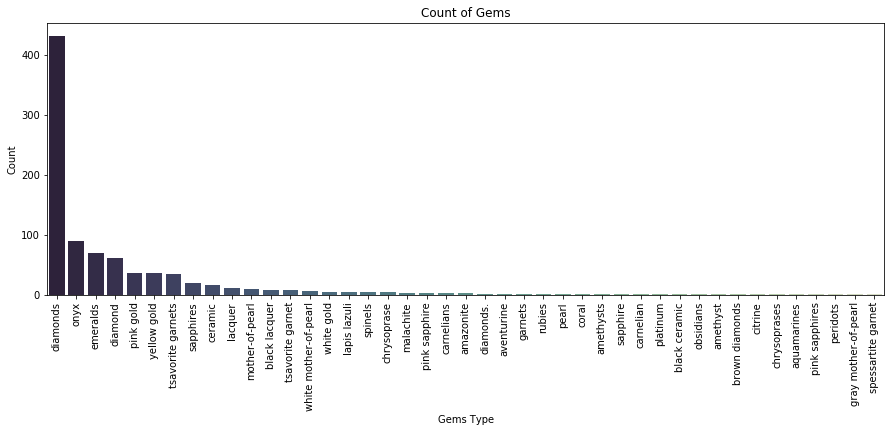

In [63]:
plt.figure(figsize=(15, 5))
sns.barplot(x= 'gem_type', y= "count", data= gems_values,
            palette= sns.cubehelix_palette(len(gems_values.gem_type), start=.5, rot=-.75, reverse= True))
plt.xlabel("Gems Type")
plt.ylabel("Count")
plt.title("Count of Gems")
plt.xticks(rotation= 90)
plt.show()

A glance at the above figure reveals to us that diamonds in all products are the most used gem, about **66 percent** of the product have diamonds in them, more than any other gems, Its most popular gem. onyx and emeralds are in the next ranks.

In [66]:
cartier.drop(['ref' , 'image' , 'tags' , 'title' , 'description'] , axis  = 1 , inplace=True)

In [69]:
cartier.head(10)

,categorie,price,metal,gem,second_gem,third_gem,foruth_gem
0,rings,1650.0,yellow gold,0,0,0,0
1,rings,3650.0,platinum,0,0,0,0
2,rings,1650.0,pink gold,0,0,0,0
3,rings,1770.0,white gold,0,0,0,0
4,rings,1070.0,yellow gold,0,0,0,0
5,rings,1070.0,pink gold,0,0,0,0
6,rings,1140.0,white gold,0,0,0,0
7,rings,2380.0,platinum,0,0,0,0
8,rings,3500.0,yellow gold,diamonds,0,0,0
9,rings,3500.0,pink gold,diamonds,0,0,0


In [64]:
#set color palette for metals
color_dict = {'yellow gold': "#fcc72d", 
              'platinum': "#e5e4e2", 
              'pink gold': "#e9cdd0", 
              'white gold': "#f9f3d1", 
              'non-rhodiumized white gold': "#C0C0C0"}

## 2. Which metal mostly used in Cartier jewelry?

In [8]:
cartier_gp = cartier.groupby('categorie')['metal'].value_counts().to_frame()
cartier_gp.columns = ['count']
cartier_gp.reset_index(level = [0 , 1] , inplace=True)

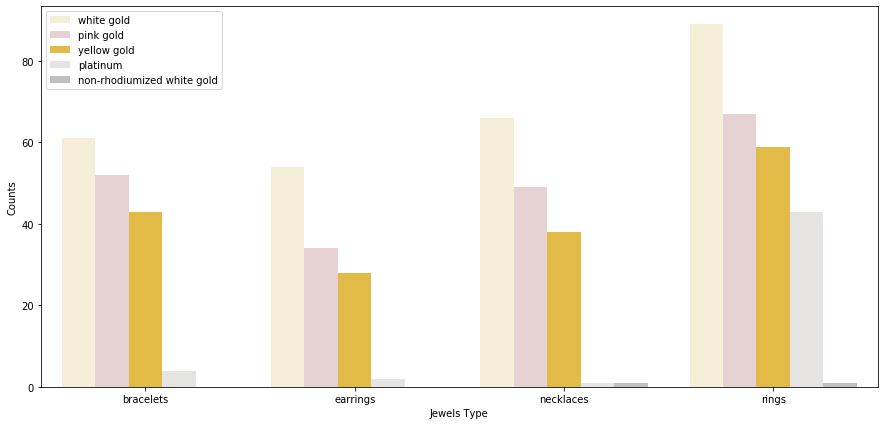

In [12]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'count', hue= 'metal', data= cartier_gp ,  palette= color_dict)
plt.xlabel('Jewels Type')
plt.ylabel('Counts')
plt.legend(loc= 'upper left')
plt.show()

Jewels type include 4 category: **rings, earring, necklaces and bracelets** 
Ranks of metals in every category are the same and equal: 1. White Gold 2. Pink Gold 3.Yellow Gold 4. Platinum 5. Non-Rhodiumized White Gold.

## 3. How much is the mean of Cartier jewelry as a metal type?

In [13]:
cartier_gp1 = cartier.groupby(["categorie", "metal"])["price"].mean().round(2).to_frame()
cartier_gp1 = cartier_gp1.reset_index()

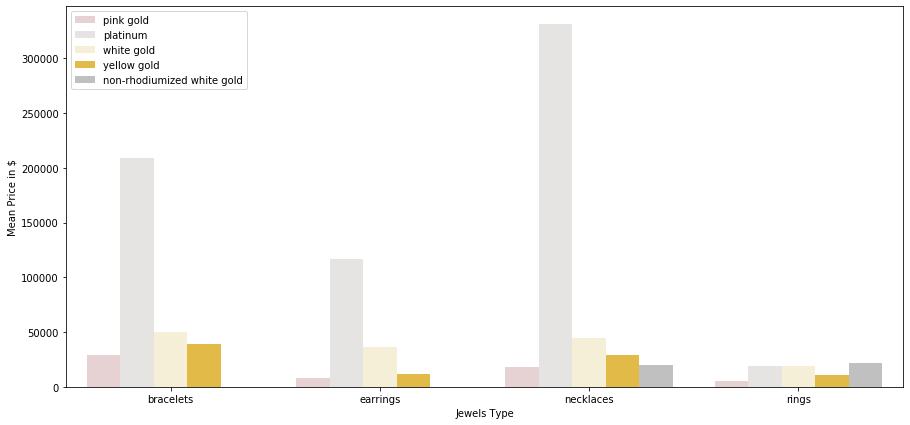

In [16]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'metal', data= cartier_gp1 , palette = color_dict)
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(loc= "upper left")
plt.show()

In every category **Platinum** in most valuable metal with a huge difference in price as $. After that White Gold have a second place but other metals are close in price for every category

## 4. How much the mean price for every metal type in all products?

In [17]:
cartier_gp2 = cartier.groupby("metal")["price"].mean().round(2).to_frame()
cartier_gp2.reset_index(inplace=True)

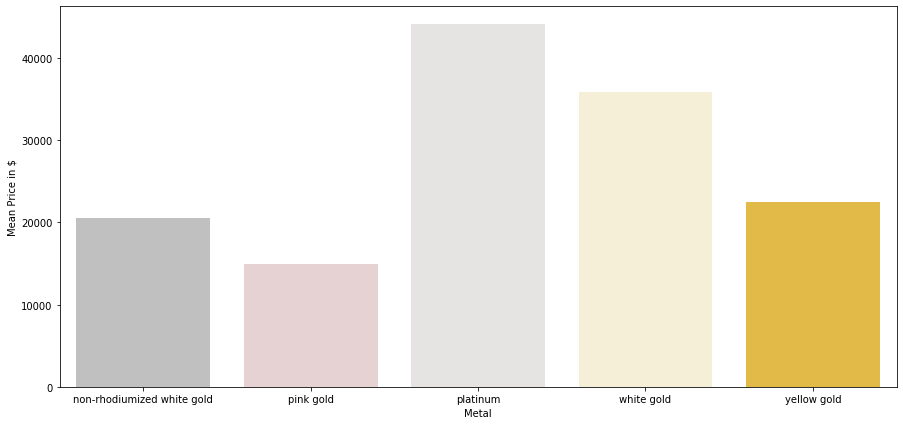

In [41]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "metal" , y = 'price', data=cartier_gp2 , palette = color_dict)
plt.xlabel('Metal')
plt.ylabel('Mean Price in $')
plt.show()

As we saw earlier Platinium is the most valuable metal that the Cartier used in jewels. The mean price of **Platinium** jewels is more than **40000 dollars** after that white metal is second. **"Yellow Gold"** and **"Non-Rhodiumized White Gold"** are about equal in mean price, in last is **pink gold** with mean of **15000** dollars that is about one of third of Platinium

## 5. How many gems in every jewels category?

In [21]:
cartier_gp_gem = cartier.groupby('categorie')['gem'].value_counts().to_frame()
cartier_gp_gem.columns = ['count']
cartier_gp_gem.reset_index(level = [0 , 1] , inplace=True)
cartier_gp_gem = cartier_gp_gem[cartier_gp_gem["gem"] != 0]

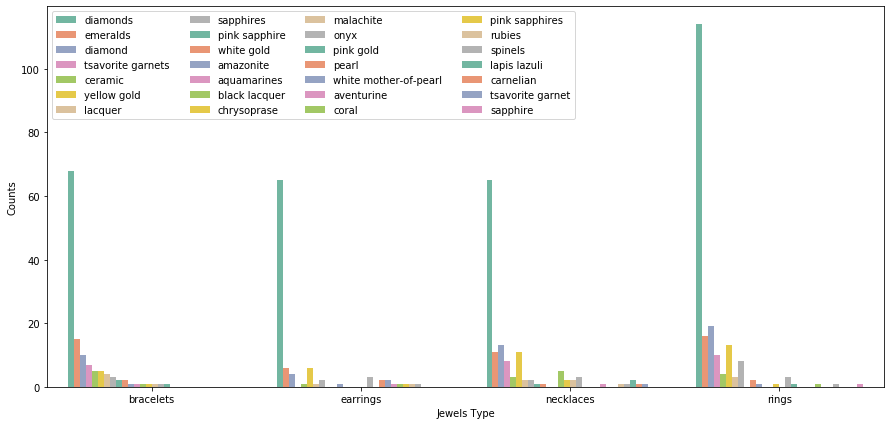

In [26]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'count', hue= 'gem', data= cartier_gp_gem , palette = sns.color_palette("Set2"))
plt.xlabel('Jewels Type')
plt.ylabel('Counts')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

In all categories, **diamond** is the most popular gem in the making of jewelry.  Exceedingly over 100 ring types include **diamonds**, in most cases more than one piece of **diamond**. This also rules for other categories of jewelry such as **earrings**, **necklaces**, and **bracelets**. Variety of the gems used in **rings** and **bracelets** are more than **earrings** and **necklaces**. Furthermore, **Sapphires** are also a popular gem used in **ring** production.

## 6. How much the gem price in every jewels category?

In [42]:
cartier_gp1_gem = cartier.groupby(["categorie", "gem"])["price"].mean().round(2).to_frame()
cartier_gp1_gem = cartier_gp1_gem.reset_index()
cartier_gp1_gem = cartier_gp1_gem[cartier_gp1_gem["gem"] != 0]

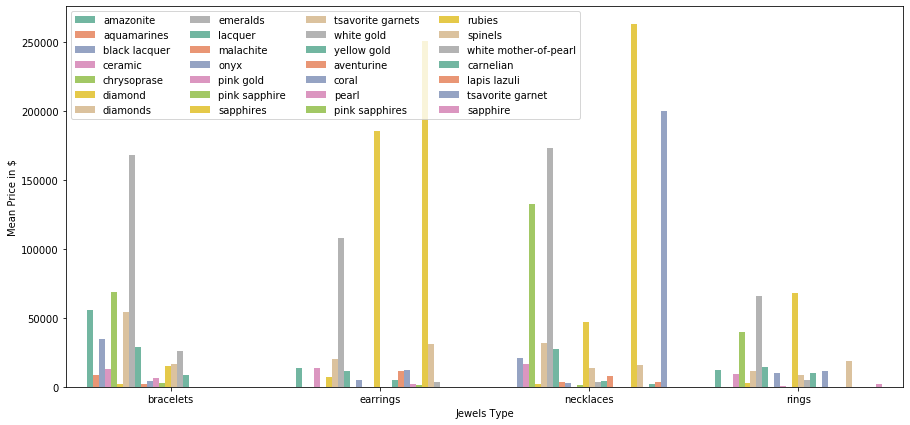

In [31]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'gem', data= cartier_gp1_gem , palette = sns.color_palette("Set2"))
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

In [32]:
cartier_gp2_gem = cartier.groupby("gem")["price"].mean().round(2).to_frame()
cartier_gp2_gem.reset_index(inplace=True)
cartier_gp2_gem = cartier_gp2_gem[(cartier_gp2_gem['gem'] != 'white gold') &
                                  (cartier_gp2_gem['gem'] != 'yellow gold') & 
                                  (cartier_gp2_gem['gem'] != 0)]

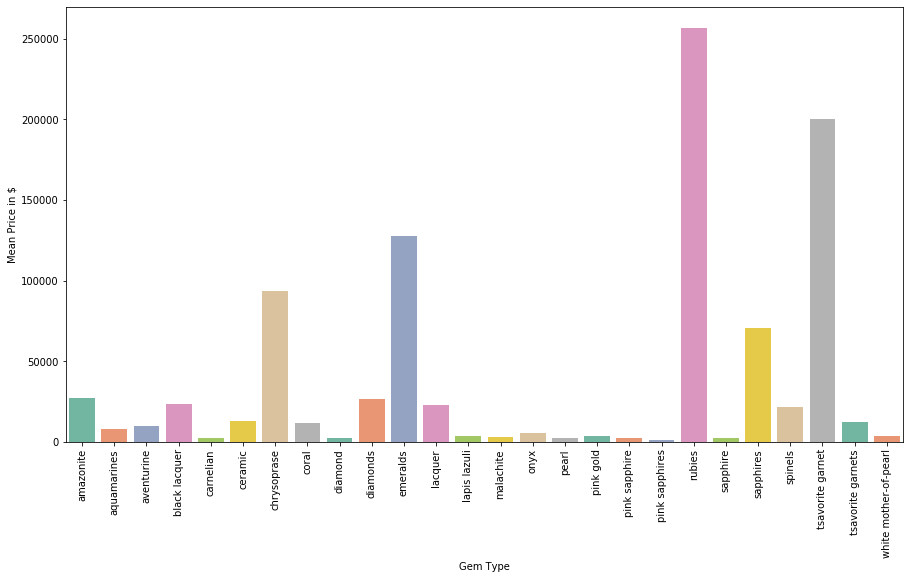

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(x= 'gem' , y = 'price', data=cartier_gp2_gem ,  palette = sns.color_palette("Set2"))
plt.xlabel('Gem Type')
plt.ylabel('Mean Price in $')
plt.xticks(rotation=90)
plt.show()